### NAME : S.Sanjith

### ID NO : 190562G

### COURSE CODE : EN2550


In [1]:
# Importing libraries

import numpy as np
import cv2 as cv
from plyfile import PlyData, PlyElement  # Open 3d is the standard
import matplotlib.pyplot as plt

im_dir = r'E:/Semester 4/EN2550_FundamentalsOfImageProcessing/Fun-Times/Exercises/images/'

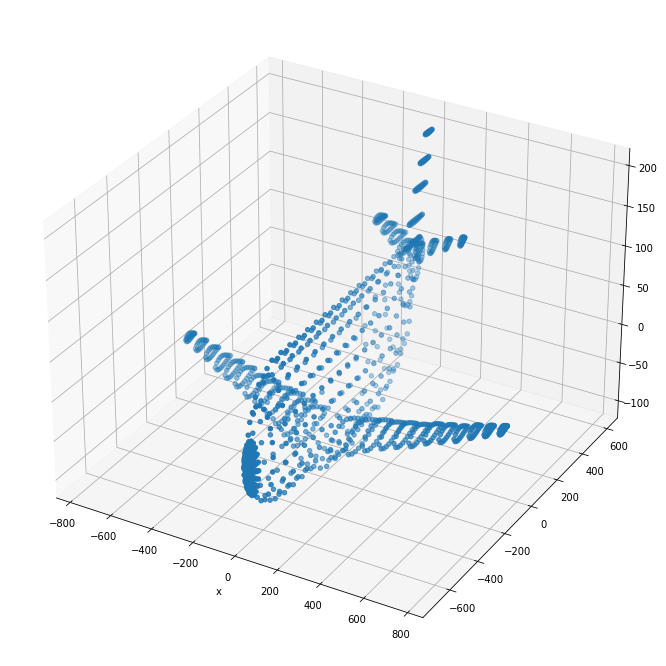

In [2]:
# Question 01
pcd = PlyData.read(im_dir+'airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(
    1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points, axis=1).reshape(3, 1)


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[0,:], points[1,:],points[2,:])
ax.set_xlabel('x')
ax.set_label('y')
ax.set_label('z')

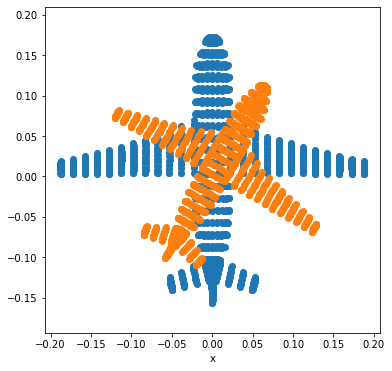

In [12]:
ones = np.ones((1, points.shape[1]))
X = np.concatenate((points, ones), axis=0)

R = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
K = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
t = np.array([[0], [0], [-4000]])

P1 = K @ np.concatenate((R, t), axis=1)


R = np.array([[0.5000,0.8660, 0], [ -0.8660,0.5000, 0], [0, 0, 1]])
K = np.array([[0, 0.75, 0], [0.75, 0, 0], [0, 0, 1]])
t = np.array([[0], [0], [-4000]])

P2 = K @ np.concatenate((R, t), axis=1)


X1 = P1 @ X
X2 = P2 @ X

X1 = X1/X1[2, :]
X2 = X2/X2[2, :]

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(6, 6))
ax.scatter(X1[0, :], X1[1, :])
ax.scatter(X2[0, :], X2[1, :])
ax.set_xlabel('x')
ax.set_label('y')
ax.axis('equal')
plt.show()

In [63]:
# Question 02
P =np.array([[353.553,339.645,277.744,-1449460],[-103.528,23.3212,459.607,-632525],[0.707107,-0.353553,0.612372,-918.559]])

# Calculation of R and K with QR Decomposition
R,K=np.linalg.qr(P[:,:3])
# Calculation of Translation Matrix
t=np.linalg.inv(K)@P[:,3:]
print(" M_int = \n",K)
print("\n R = \n",  R)
print("t = \n",t)


 M_int = 
 [[-368.39960721 -319.40278759 -137.39282822]
 [   0.         -117.83288451 -519.11721477]
 [   0.            0.            4.607284  ]]

 R = 
 [[-9.59699720e-01 -2.81027102e-01  4.63308959e-04]
 [ 2.81020929e-01 -9.59664772e-01  8.41208347e-03]
 [-1.91940216e-03  8.20327367e-03  9.99964510e-01]]
t = 
 [[-1406.73321972]
 [ 6246.32030172]
 [ -199.37103947]]


Item 1 are in pixesl =  59143
Item 1 are in mm sq =  2318.642172
Item 2 are in pixesl =  59211
Item 2 are in mm sq =  2321.3080440000003


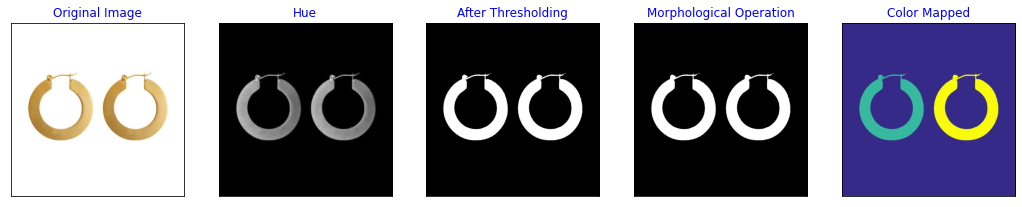

In [6]:
# Question 03

# earrings image
im = cv.imread(im_dir+'earrings.jpg', cv.IMREAD_COLOR)
assert im is not None

hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
th, bw = cv.threshold(hsv[:, :, 1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

w = 5
kernel = np.ones((w, w), np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)


retbal, labels, stats, centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap(
    (labels/np.amax(labels)*255).astype('uint8'), cv.COLORMAP_PARULA)

z = 720  # mm
f = 8  # mm

for i, s in enumerate(stats):
    if i != 0:
        print('Item', i,  'are in pixesl = ', s[4])
        print('Item', i,  'are in mm sq = ', s[4]*(2.2e-3)**2*(z**2)/(f**2))


fig, ax = plt.subplots(1, 5, figsize=(18, 6))

ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image",color='b')

ax[1].imshow(cv.cvtColor(hsv[:, :, 1], cv.COLOR_BGR2RGB))
ax[1].set_title("Hue",color='b')

ax[2].imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB))
ax[2].set_title("After Thresholding",color='b')

ax[3].imshow(cv.cvtColor(opened, cv.COLOR_BGR2RGB))
ax[3].set_title("Morphological Operation",color='b')

ax[4].imshow(cv.cvtColor(colormapped, cv.COLOR_BGR2RGB))
ax[4].set_title("Color Mapped",color='b')

for i in range (5):
    ax[i].set_xticks([])
    ax[i].set_yticks([])


plt.show()

(276, 505, 34, 32)


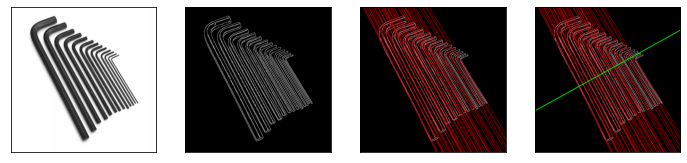

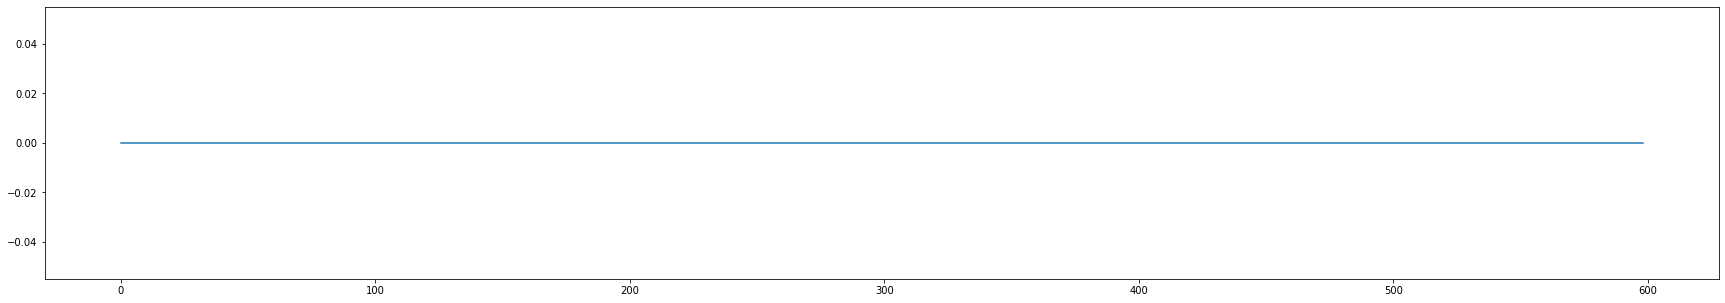

In [15]:
# Question 04
im = cv.imread(im_dir+"allenkeys.jpg", cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None


canny = cv.Canny(im, 50, 150)

# Copy edjes to the images that will display the results in BGR
canny_color = cv.cvtColor(canny, cv.COLOR_GRAY2BGR)

lines = cv.HoughLines(canny, 1, np.pi/180, 170, None, 0, 0)

if lines is not None:
    for i in range(len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        pt1 = (int(x0+1000*(-b)), int(y0+1000*a))
        pt2 = (int(x0-1000*(-b)), int(y0-1000*a))
        cv.line(canny_color, pt1, pt2, (0, 0, 255), 1, cv.LINE_AA)



fig, ax = plt.subplots(1, 4, figsize=(12, 6))

ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(canny, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(canny_color, cv.COLOR_BGR2RGB))


r=cv.selectROI('Image',canny_color, showCrosshair=True, fromCenter=False)
print(r)
cv.destroyAllWindows()

x0, y0 =int(r[0]+r[2]/2), int(r[1]/2+r[3]/2)
m=np.tan(np.median(lines[:,0,1]))
c=y0-m*x0

cv.line(canny_color,(0,int(c)),(im.shape[0],int(m*im.shape[0]+c)),(0,255,0),2,cv.LINE_AA)
ax[3].imshow(cv.cvtColor(canny_color, cv.COLOR_BGR2RGB))

for i in range (4):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()


dy=1
y_sub_pixel = np.arange(0,im.shape[0]-1,dy)
f_sub_pixel = np.zeros_like(y_sub_pixel)
f_sub_pixel_nn=np.zeros_like(y_sub_pixel)

for i,y in enumerate(y_sub_pixel):
    pass

fig,ax =plt.subplots(figsize=(30,5))
ax.plot(f_sub_pixel)
